## Problem Statement
The problem that the company is facing is that its pipeline conversion percentage has dropped from 35% at the end of the last fiscal (FY 2019-20) to 25% at present. The company needs a solution to solve the issue.

Here are a few details about TechnoServe:
- The company is based out of Pune and started its operations in 2010.
- It has clients spread over Pune and other cities as well.
- There are more than 600 employees, distributed over multiple teams.
- It has a wide variety of IT solutions spread across different industries.

**Objectives**
Utilise the concepts that you learnt in Business Problem Solving module to develop a solution for the given problem statement. Make sure you include the following points

1. Go through the links provided and the dataset given to developing 4-5 hypotheses regarding the possible root causes of  low lead conversion
2. Map the problem to the relevant data science problem and develop the solution approach that you’ll follow.
3. Proceed with EDA to find the most relevant variables that affect lead conversion. 
4. Discuss at least 3 ML models that can be utilised to solve this problem. Note that you don’t have to build the model for the dataset, just a brief description of the models that would work in this scenario along with the reasons on when one can be preferred over the other.
5. Mention the evaluation metrics that you’ll be using to track your model’s performance. Make sure that they’re mapped to the relevant business outcomes.


## Data Dictionary
1. Opportunity ID - A unique identification number for the opportunity (Starts from 1) 
2. Technology Primary Type of solution offered to the customers: 
    - ERP Implementation 
    - Analytics 
    - Technical Business Solutions 
    - Legacy Modernization 
3. City Name of the city where the lead operates 
    - Chennai 
    - Mumbai 
    - Kolkata 
    - Bengaluru 
    - Delhi 
    - Hyderabad 
    - Pune 
4. B2B Sales Medium - The medium used to sell the product 
    - Marketing 
    - Enterprise Sellers 
    - Online Leads 
    - Tele Sales 
    - Partners 
5. Sales Velocity - Number of days spent in the sales stage 
6. Opportunity Status - Whether the lead is successfully converted or lost (Won/Lost) 
7. Sales Stage Iterations Number of times the status of an opportunity changes (back and forwards) 
8. Opportunity Size (USD) Potential revenue from the opportunity  
9. Client Revenue Sizing (USD) Categorising the client based on their average quarterly revenue 
    - 100K or less 
    - 100K to 250K 
    - 250K to 500K 
    - 500K to 1M 
    - More than 1M 
10. Client Employee Sizing TechnoServe employee man-hours involved with the client over the opportunity 
    - 1K or less 
    - 1K to 5K 
    - 5K to 10K 
    - 10K to 15K 
    - 15K to 25K 
    - More than 25K 
11. Business from Client Last Year (USD) Revenue generated from the client over the past year 
    - 0 (No Business) 
    - 0 - 25,000 
    - 25,000 - 50,000 
    - 50,000 - 100, 000 
    - More than 100, 000 
12. Compete Intel Whether there is any information on the competitor (Known / Unknown / None) 
13. Opportunity Sizing (USD) Categorising the client based on the potential revenue (Opportunity Size) 
    - 10K or less 
    - 10K to 20K 
    - 20K to 30K 
    - 30K to 40K 
    - 40K to 50K 
    - 50K to 60K 
    - More than 60K 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Datasets/Sales Dataset.xlsx")
df.head()

,Opportunity ID,Technology\nPrimary,City,B2B Sales Medium,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing
0,N00000001,ERP Implementation,Bengaluru,Marketing,76,Won,13,0,More than 1M,More than 25K,0 (No business),Unknown,10K or less
1,N00000002,ERP Implementation,Delhi,Enterprise Sellers,63,Loss,2,0,250K to 500K,More than 25K,0 (No business),Unknown,10K or less
2,N00000003,Technical Business Solutions,Delhi,Enterprise Sellers,24,Won,7,7750,100K or less,1K or less,0 (No business),Unknown,10K or less
3,N00000004,Technical Business Solutions,Mumbai,Enterprise Sellers,16,Loss,5,0,100K or less,1K or less,0 (No business),Known,10K or less
4,N00000005,ERP Implementation,Delhi,Enterprise Sellers,69,Loss,11,32886,100K or less,1K or less,0 (No business),Unknown,30K to 40K


In [3]:
df.shape

(78025, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025 entries, 0 to 78024
Data columns (total 13 columns):
Opportunity ID                    78025 non-null object
Technology
Primary                78025 non-null object
City                              78025 non-null object
B2B Sales Medium                  78025 non-null object
Sales Velocity                    78025 non-null int64
Opportunity Status                78025 non-null object
Sales Stage Iterations            78025 non-null int64
Opportunity Size (USD)            78025 non-null int64
Client Revenue Sizing             78025 non-null object
Client Employee Sizing            78025 non-null object
Business from Client Last Year    78025 non-null object
Compete Intel                     78025 non-null object
Opportunity Sizing                78025 non-null object
dtypes: int64(3), object(10)
memory usage: 7.7+ MB


In [5]:
df = df.rename(columns={'Technology\nPrimary': 'Technology Primary'})
df.head()

,Opportunity ID,Technology Primary,City,B2B Sales Medium,Sales Velocity,Opportunity Status,Sales Stage Iterations,Opportunity Size (USD),Client Revenue Sizing,Client Employee Sizing,Business from Client Last Year,Compete Intel,Opportunity Sizing
0,N00000001,ERP Implementation,Bengaluru,Marketing,76,Won,13,0,More than 1M,More than 25K,0 (No business),Unknown,10K or less
1,N00000002,ERP Implementation,Delhi,Enterprise Sellers,63,Loss,2,0,250K to 500K,More than 25K,0 (No business),Unknown,10K or less
2,N00000003,Technical Business Solutions,Delhi,Enterprise Sellers,24,Won,7,7750,100K or less,1K or less,0 (No business),Unknown,10K or less
3,N00000004,Technical Business Solutions,Mumbai,Enterprise Sellers,16,Loss,5,0,100K or less,1K or less,0 (No business),Known,10K or less
4,N00000005,ERP Implementation,Delhi,Enterprise Sellers,69,Loss,11,32886,100K or less,1K or less,0 (No business),Unknown,30K to 40K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025 entries, 0 to 78024
Data columns (total 13 columns):
Opportunity ID                    78025 non-null object
Technology Primary                78025 non-null object
City                              78025 non-null object
B2B Sales Medium                  78025 non-null object
Sales Velocity                    78025 non-null int64
Opportunity Status                78025 non-null object
Sales Stage Iterations            78025 non-null int64
Opportunity Size (USD)            78025 non-null int64
Client Revenue Sizing             78025 non-null object
Client Employee Sizing            78025 non-null object
Business from Client Last Year    78025 non-null object
Compete Intel                     78025 non-null object
Opportunity Sizing                78025 non-null object
dtypes: int64(3), object(10)
memory usage: 7.7+ MB


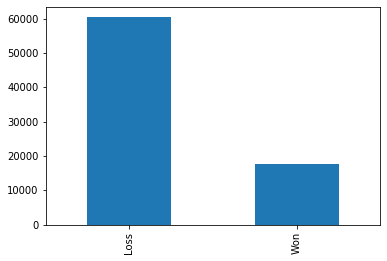

In [9]:
# Checking the data imbalance in target column
df["Opportunity Status"].value_counts().plot.bar();

## City vs Opportunity Status

In [15]:
pd.crosstab(df["City"], df["Opportunity Status"])

Opportunity Status,Loss,Won
City,,
Bengaluru,7478,2074
Chennai,5917,1651
Delhi,11698,3444
Hyderabad,7211,2021
Kolkata,5793,1565
Mumbai,15687,5333
Pune,6614,1539


In [26]:
df_city = pd.crosstab(df["City"], df["Opportunity Status"])
df_city["win ratio"] = round((df_city["Won"] / df_city["Loss"]) * 100, 2)
df_city

Opportunity Status,Loss,Won,win ratio
City,,,
Bengaluru,7478,2074,27.73
Chennai,5917,1651,27.90
Delhi,11698,3444,29.44
Hyderabad,7211,2021,28.03
Kolkata,5793,1565,27.02
Mumbai,15687,5333,34.00
Pune,6614,1539,23.27


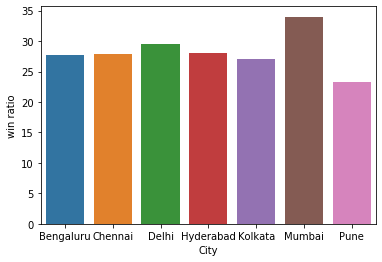

In [28]:
# Plotting bar plot for better visualisation
sns.barplot(df_city.index, df_city["win ratio"], order=);

Mumbai has the highest winning chances and then Delhi over loss.